# Omni data load

In [1]:
import os
import pickle
from spacepy import pycdf
import pandas as pd
import numpy as np
import datetime

In [2]:
cdf = pycdf.CDF('/home/simon/Desktop/Bachelor_project/data/omni2_h0_mrg1hr_20150101_v01.cdf')
data = cdf.copy()
cdf.close()

In [3]:
data['BZ_GSM']

VarCopy([ 1.10000002,  0.30000001, -0.69999999, ..., -0.1       ,
         -0.40000001,  0.30000001], dtype=float32)

In [4]:
data.keys()

dict_keys(['Epoch', 'YR', 'Day', 'HR', 'Rot#', 'IMF', 'PLS', 'IMF_PTS', 'PLS_PTS', 'ABS_B', 'F', 'THETA_AV', 'PHI_AV', 'BX_GSE', 'BY_GSE', 'BZ_GSE', 'BY_GSM', 'BZ_GSM', 'SIGMA-ABS_B', 'SIGMA-B', 'SIGMA-Bx', 'SIGMA-By', 'SIGMA-Bz', 'T', 'N', 'V', 'PHI-V', 'THETA-V', 'Ratio', 'Pressure', 'SIGMA-T', 'SIGMA-N', 'SIGMA-V', 'SIGMA-PHI-V', 'SIGMA-THETA-V', 'SIGMA-ratio', 'E', 'Beta', 'Mach_num', 'Mgs_mach_num', 'PR-FLX_1', 'PR-FLX_2', 'PR-FLX_4', 'PR-FLX_10', 'PR-FLX_30', 'PR-FLX_60', 'MFLX', 'R', 'F10_INDEX', 'KP', 'DST', 'AE', 'AP_INDEX', 'AL_INDEX', 'AU_INDEX', 'PC_N_INDEX', 'Solar_Lyman_alpha'])

## Get the time 

In [5]:
start =datetime.datetime(data['YR'][0],1,1,data['HR'][0])
dates = start + (data['Day']-1) * datetime.timedelta(days=1)+(data['HR']) *60* datetime.timedelta(minutes=1)

## Create data frame and save file

In [6]:
selected_data= [np.array(data['AP_INDEX']),np.array(data['KP'])/10,np.array(data['F10_INDEX']),np.array(data['BZ_GSE']),np.array(data['DST'])]
names = ['AP_INDEX','Kp','F10_INDEX','BZ_GSE','DST']
df = pd.DataFrame(np.transpose(selected_data), index=dates, columns=names)


In [7]:
cdf = pycdf.CDF('/home/simon/Desktop/Bachelor_project/data/omni2_h0_mrg1hr_20140701_v01.cdf')
data = cdf.copy()
cdf.close()

In [8]:
data.keys()

dict_keys(['Epoch', 'YR', 'Day', 'HR', 'Rot#', 'IMF', 'PLS', 'IMF_PTS', 'PLS_PTS', 'ABS_B', 'F', 'THETA_AV', 'PHI_AV', 'BX_GSE', 'BY_GSE', 'BZ_GSE', 'BY_GSM', 'BZ_GSM', 'SIGMA-ABS_B', 'SIGMA-B', 'SIGMA-Bx', 'SIGMA-By', 'SIGMA-Bz', 'T', 'N', 'V', 'PHI-V', 'THETA-V', 'Ratio', 'Pressure', 'SIGMA-T', 'SIGMA-N', 'SIGMA-V', 'SIGMA-PHI-V', 'SIGMA-THETA-V', 'SIGMA-ratio', 'E', 'Beta', 'Mach_num', 'Mgs_mach_num', 'PR-FLX_1', 'PR-FLX_2', 'PR-FLX_4', 'PR-FLX_10', 'PR-FLX_30', 'PR-FLX_60', 'MFLX', 'R', 'F10_INDEX', 'KP', 'DST', 'AE', 'AP_INDEX', 'AL_INDEX', 'AU_INDEX', 'PC_N_INDEX', 'Solar_Lyman_alpha'])

In [9]:
data['Day'][0]

182

In [10]:
start =datetime.datetime(data['YR'][0],1,1,data['HR'][0])
dates = start + (data['Day']-1) * datetime.timedelta(days=1)+(data['HR']) *60* datetime.timedelta(minutes=1)

In [11]:
selected_data= [np.array(data['F10_INDEX'])]
names = ['F10_Mean']
F10_Mean = pd.DataFrame(np.transpose(selected_data), index=dates, columns=names)
F10_Mean=pd.concat([F10_Mean.F10_Mean,df.F10_INDEX])
F10_Mean=F10_Mean.rolling(81*24,min_periods=81*24).mean().dropna(how='any')

In [12]:
df.loc[:,'F10_Mean'] = F10_Mean[df.index[0]:]

In [13]:
import matplotlib.pyplot as plt
%matplotlib notebook

Text(0.5,1,'F10.7')

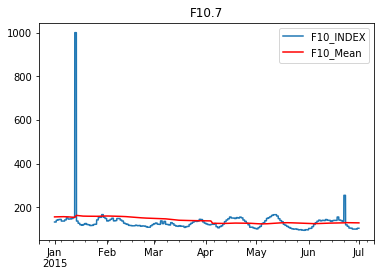

In [14]:
plt.figure()

p1 = df.F10_INDEX.plot(legend=True)
p2 = df.F10_Mean.plot( style='r',legend=True)
plt.title('F10.7')

In [15]:
#df.to_csv('/home/simon/Desktop/Bachelor_project/data/cvs_files/omni.csv')
df.to_pickle('/home/simon/Desktop/Bachelor_project/data/pkl_files/omni.pkl')

## Load half orbit means and add omni date to data frame

In [16]:
#Half_orbit = pd.read_csv('/home/simon/Desktop/Bachelor_project/data/cvs_files/half_orbit_means.csv', index_col=0)
#Half_orbit.index = pd.to_datetime(Half_orbit.index)
Half_orbit = pd.read_pickle('/home/simon/Desktop/Bachelor_project/data/pkl_files/half_orbit_means.pkl')
df_alligned = df.reindex(Half_orbit.index,method='ffill')
Half_orbit_plus = pd.concat([Half_orbit,df_alligned], axis=1)
Half_orbit_plus.to_pickle('/home/simon/Desktop/Bachelor_project/data/pkl_files/half_orbit_and_omni.pkl')